# Test B - Quick Loop at Russian Troll Dataset Using UMAP and some of the fields - only 300,000 of 3 million rows

In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import glob as glob

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
import umap


In [4]:
reducer = umap.UMAP()

In [5]:
knn_dir = "../WellsKNN/"
load_dir = "../loadLAS"
features_dir = "../createFeatures/"

In [6]:
path =r'.' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [7]:
frame_1 = frame.copy()

In [8]:
frame_1.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel slippery floors https://t.co/R...,United States,Norwegian,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2160,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer


In [9]:
all_col = list(frame_1.columns)

In [10]:
all_col

['external_author_id',
 'author',
 'content',
 'region',
 'language',
 'publish_date',
 'harvested_date',
 'following',
 'followers',
 'updates',
 'post_type',
 'account_type',
 'new_june_2018',
 'retweet',
 'account_category']

In [11]:
len(frame_1)

2973371

In [12]:
frame_1.account_category = pd.Categorical(frame_1.account_category)

In [13]:
frame_1

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel slippery floors https://t.co/R...,United States,Norwegian,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2160,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,Your opinion on Hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer
6,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Lilith from Frasier. 0_O,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2156,RETWEET,Hashtager,0,1,HashtagGamer
7,1.674084e+09,GAB1ALDANA,Come find us at the national mall for the #DC ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2157,RETWEET,Hashtager,0,1,HashtagGamer
8,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Trolling celebrities. I have...,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2161,RETWEET,Hashtager,0,1,HashtagGamer
9,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Morbid comedy �,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2167,RETWEET,Hashtager,0,1,HashtagGamer


In [14]:
#frame_1['account_category_codes'] = frame_1.account_category.cat.codes


In [15]:
frame_1.account_category = pd.Categorical(frame_1.account_category)
frame_1['account_category_codes'] = frame_1.account_category.cat.codes
frame_1['post_type_codes'] = pd.Categorical(frame_1.post_type)
frame_1['post_type_codes'] = frame_1.post_type_codes.cat.codes
frame_1['language_codes'] = pd.Categorical(frame_1.language)
frame_1['language_codes'] = frame_1.language_codes.cat.codes
frame_1['author_codes'] = pd.Categorical(frame_1.author)
frame_1['author_codes'] = frame_1.author_codes.cat.codes
frame_1['region_codes'] = pd.Categorical(frame_1.region)
frame_1['region_codes'] = frame_1.region_codes.cat.codes
frame_1['post_type_codes'] = pd.Categorical(frame_1.post_type)
frame_1['post_type_codes'] = frame_1.post_type_codes.cat.codes
frame_1['account_type_codes'] = pd.Categorical(frame_1.account_type)
frame_1['account_type_codes'] = frame_1.account_type_codes.cat.codes
frame_1['external_author_id_codes'] = pd.Categorical(frame_1.external_author_id)
frame_1['external_author_id_codes'] = frame_1.external_author_id_codes.cat.codes

In [16]:
frame_1.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'new_june_2018', 'retweet',
       'account_category', 'account_category_codes', 'post_type_codes',
       'language_codes', 'author_codes', 'region_codes', 'account_type_codes',
       'external_author_id_codes'],
      dtype='object')

In [17]:
frame_2 = frame_1[['following', 'followers', 'updates','retweet', 'account_category_codes', 'post_type_codes',
       'language_codes', 'author_codes', 'region_codes', 'account_type_codes',
       'external_author_id_codes']]

In [18]:
frame_3 = frame_2[0:300000]

In [19]:
frame_3_col = frame_3.columns
frame_3_col

Index(['following', 'followers', 'updates', 'retweet',
       'account_category_codes', 'post_type_codes', 'language_codes',
       'author_codes', 'region_codes', 'account_type_codes',
       'external_author_id_codes'],
      dtype='object')

In [20]:
frame_3 = frame_3.fillna(0)

In [21]:
reducer = umap.UMAP()

In [22]:
embedding  = reducer.fit_transform(frame_3)
embedding.shape

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 2557 connected components using meta-embedding (experimental)
  n_components
/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(300000, 2)

In [23]:
# standard_embedding = umap.UMAP(random_state=42).fit_transform(frame_3)
# plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target, s=0.1, cmap='Spectral');

In [24]:

# plt.scatter((embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in [0,1,2,3]])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the dataset', fontsize=24);

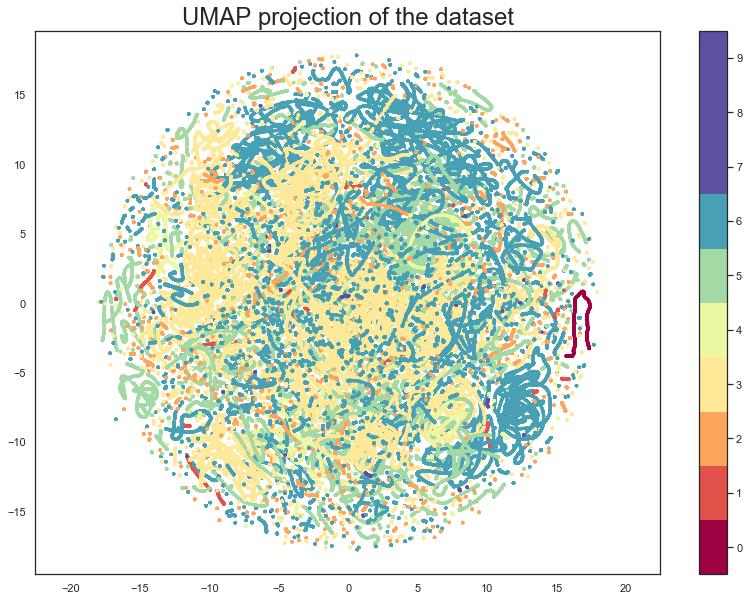

In [25]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=frame_3.account_category_codes, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=24);

In [28]:
print(list_codes)

[{'HashtagGamer': 2}, {'Fearmonger': 1}, {'NonEnglish': 5}, {'LeftTroll': 3}, {'RightTroll': 6}, {'Unknown': 7}, {'NewsFeed': 4}, {'Commercial': 0}]


In [27]:
account_category_val = frame_1.account_category.unique()
account_category_codes_val = frame_1.account_category_codes.unique()
list_codes = []
count = 0
for i in account_category_val:
    dict_codes = {}
    i = count
    dict_codes[account_category_val[i]] = account_category_codes_val[i]
#     dict_codes['account_category_val'] = account_category_val[i]
#     dict_codes['account_category_codes_val'] = account_category_codes_val[i]
    count += 1
    list_codes.append(dict_codes) 
print(list_codes)
# print(account_category_val)
# print(account_category_codes_val)

[{'HashtagGamer': 2}, {'Fearmonger': 1}, {'NonEnglish': 5}, {'LeftTroll': 3}, {'RightTroll': 6}, {'Unknown': 7}, {'NewsFeed': 4}, {'Commercial': 0}]


In [ ]:
frame_1[0:800]

In [ ]:
#frame_3[0:800]

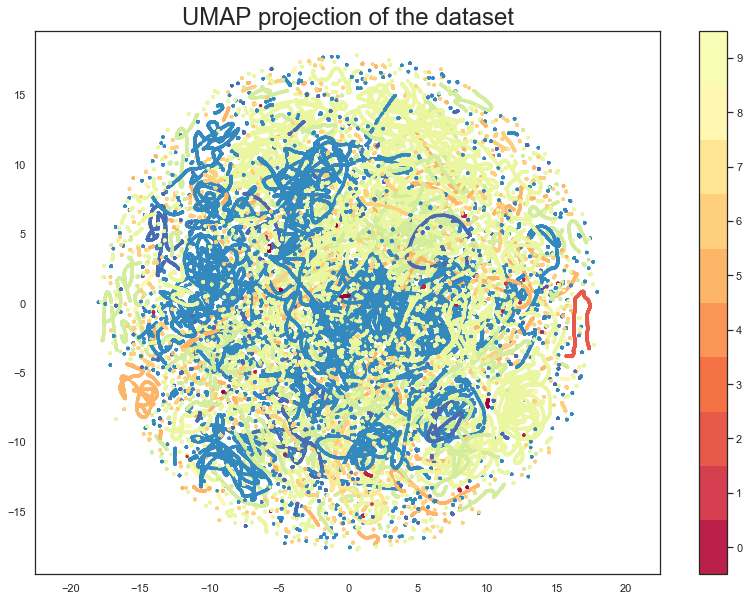

In [34]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=frame_3.account_type_codes, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.savefig('books_read.png', dpi=100)
plt.title('UMAP projection of the dataset', fontsize=24);

In [30]:
plt.savefig('vA_300000_account_type_codes.png')

<Figure size 1008x720 with 0 Axes>

In [33]:
plt.savefig('books_read.png', dpi=100)
plt.show()

<Figure size 1008x720 with 0 Axes>

In [ ]:
# frame_4 = frame_2[:]
# frame_4 = frame_4.fillna(0)

In [ ]:
# reducer = umap.UMAP()

In [ ]:
# embedding  = reducer.fit_transform(frame_4)
# embedding.shape

In [ ]:
# plt.scatter(embedding[:, 0], embedding[:, 1], c=frame_3.account_category_codes, cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.title('UMAP projection of the dataset', fontsize=24);